<a href="https://colab.research.google.com/github/isys5002-itp/isys5002-2023-semester2/blob/main/10_1_analysing_and_visualising_superheroes_dataset_Tue10AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Development Notebook
This notebook is an example of how you could structure your development notebook for your assignment.

- you start with an algorithm/steps/plan
- walk through the steps of your analysis and code development process



**Import libraries and Load the Dataset**

In [1]:
import sqlite3
import pandas as pd

**Establish the connection to the database**

In [4]:
connection = sqlite3.connect('superheroes.db')
cursor = connection.cursor()

Inspect the database schema and find out what tables exist in the "superheroes.db" database, to understand the structure of the database before deciding which specific table(s) to work with or query.

In [5]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()


[('your_table',), ('superheroes',)]

We will be working on the dataset in the 'superheroes' table.
Load the table into Pandas dataframe

In [6]:
sql='''
SELECT * from superheroes;
'''
# Load the data into a DataFrame
sp_df = pd.read_sql_query(sql, connection)


In [ ]:
sp_df

# **Data Exploration:**

Exploring the structure of the dataset.

Use basic Pandas functions to inspect the data:
- Display the first few rows of the dataset using head().
- Use info() to get information about the data types and missing values.
- Use describe() to get summary statistics for numerical columns (if any).

In [9]:
# Display the first few rows of the dataset
sp_df.head(10)

,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
1,2,Prince,Diana,Wonder Woman,Female,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
4,5,Maximoff,Wanda,Scarlet Witch,Female,Good
5,6,Brolin,Josh,Thanos,Male,Evil
6,7,Napier,Joker,Joker,Male,Evil
7,8,Uxas,Darkseid,Darkseid,Male,Evil
8,9,Parker,Peter,Spider-Man,Male,Good
9,10,Goblin,Green,Green Goblin,Male,Evil


In [10]:
# Get general information about the dataset
sp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [11]:
# Summary statistics of numerical columns
sp_df.describe()

,id
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


## **Pre-processing and cleaning data**





***For learning purpose, we will use the superheroes_modified.csv file for the following activity.***

### **Checking for duplicates**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/superheroes_modified.csv')
df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          29 non-null     int64 
 1   last_name   29 non-null     object
 2   first_name  29 non-null     object
 3   superhero   29 non-null     object
 4   gender      29 non-null     object
 5   alignment   26 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


In [ ]:
df.describe()

source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [ ]:
# Check for duplicates based on all columns
df.duplicated()

In [16]:
# To see the duplicate rows, you can use boolean indexing:
df[df.duplicated()]

,id,last_name,first_name,superhero,gender,alignment
25,2,Prince,Diana,Wonder Woman,Female,Good
26,5,Maximoff,Wanda,Scarlet Witch,Female,Good
27,20,Romanoff,Natasha,Black Widow,Female,Good
28,25,Brock,Venom,Venom,Male,Evil


**Removing duplicate values**

In [19]:
# Removing Duplicates (if any)
# df.drop_duplicates()

df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   22 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


In [ ]:
# Check for duplicates based on all columns
df.duplicated()

### Handling missing values
**Check for missing values**

In [24]:
# Check for missing values
#df.isnull()
df.isnull().sum()

id            0
last_name     0
first_name    0
superhero     0
gender        0
alignment     3
dtype: int64

In [26]:
# Check for missing values in each row
(df[df['alignment'].isnull()])

,id,last_name,first_name,superhero,gender,alignment
2,16,Darkholme,Mystique,Mystique,Female,NaN
17,24,Luthor,Lex,Lex Luthor,Male,NaN
21,4,Curry,Arthur,Aquaman,Male,NaN


**Handling missing values**

If there are missing values, we can choose to remove or impute them.

For demonstration, we'll impute missing values in the 'alignment' column with 'Unknown'.

*source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/*

In [27]:
# impute missing values with 'Unknown'.

# filling a null values using fillna()
df["alignment"].fillna("Unknown", inplace = True)

In [ ]:
df

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


# Data Analysis 1: Exploring the superheros by gender and alignment.

## **Analysing the distribution of superheroes based on their gender**

In [31]:
df.head()

,id,last_name,first_name,superhero,gender,alignment
0,14,Quinzel,Harley,Harley Quinn,Female,Evil
1,15,Kyle,Selina,Catwoman,Female,Evil
2,16,Darkholme,Mystique,Mystique,Female,Unknown
3,18,Ivy,Poison,Poison Ivy,Female,Evil
4,19,Moone,Enchantress,Enchantress,Female,Evil


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of superheroes by gender
gender_counts = df['gender'].value_counts()

gender_counts

Male      16
Female     9
Name: gender, dtype: int64

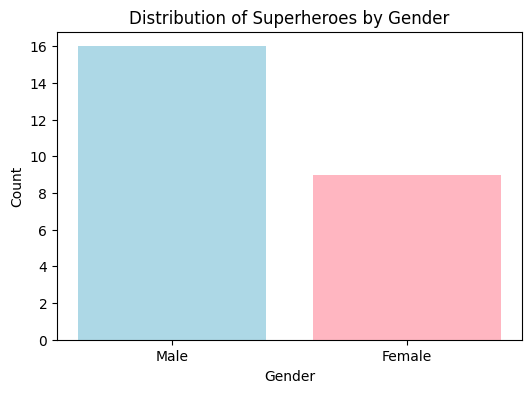

In [40]:
# Create a bar chart to visualize the distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgray'])
plt.title('Distribution of Superheroes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


## **Analysing the distribution of superheroes based on their alignment**

we analyse/compute the number of different alignmnets

In [41]:
# Calculate the count of superheroes by alignment
alignment_counts = df['alignment'].value_counts()

alignment_counts

Evil       13
Good        9
Unknown     3
Name: alignment, dtype: int64

*sources:*
- https://python-graph-gallery.com/pie-plot-matplotlib-basic/
- https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

we plot the graph to visualise the alignment distribution

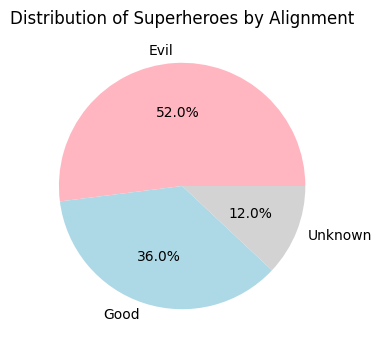

In [50]:
# Create a pie chart to visualize the distribution

plt.figure(figsize=(6, 4))
plt.pie(alignment_counts, labels = alignment_counts.index,autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'lightgray'] )
plt.title('Distribution of Superheroes by Alignment')

# Display the plot
plt.show()


# **Data Analysis 2: Exploring the  relationship between gender and alignment among superheroes.**

We examine whether there are any gender-based patterns in superhero alignment.

We look for trends, such as whether a particular gender is more commonly associated with being "Good" or "Evil."

### Data Analysis 2a: Superhero Alignment Distribution by Gender Analysis

In [ ]:
import pandas as pd

# Group the data by gender and alignment
grouped_data = df.groupby(['gender', 'alignment'])

grouped_data

In [53]:
# Calculate the count for each group
gender_alignment_counts = grouped_data.size()

gender_alignment_counts


gender  alignment
Female  Evil         4
        Good         4
        Unknown      1
Male    Evil         9
        Good         5
        Unknown      2
dtype: int64

In [54]:
import pandas as pd

# Group the data by gender and alignment
grouped_data = df.groupby(['gender', 'alignment'])

# Calculate the count for each group
gender_alignment_counts = grouped_data.size()

# Reshape the result to have gender as rows and alignment as columns
gender_alignment_counts = gender_alignment_counts.unstack()

# Replace any missing values with zeros
gender_alignment_counts = gender_alignment_counts.fillna(0)

# Display the resulting DataFrame
(gender_alignment_counts)

alignment,Evil,Good,Unknown
gender,,,
Female,4,4,1
Male,9,5,2


**Visualising the distribution of "Good" and "Evil" superheroes within each gender category**

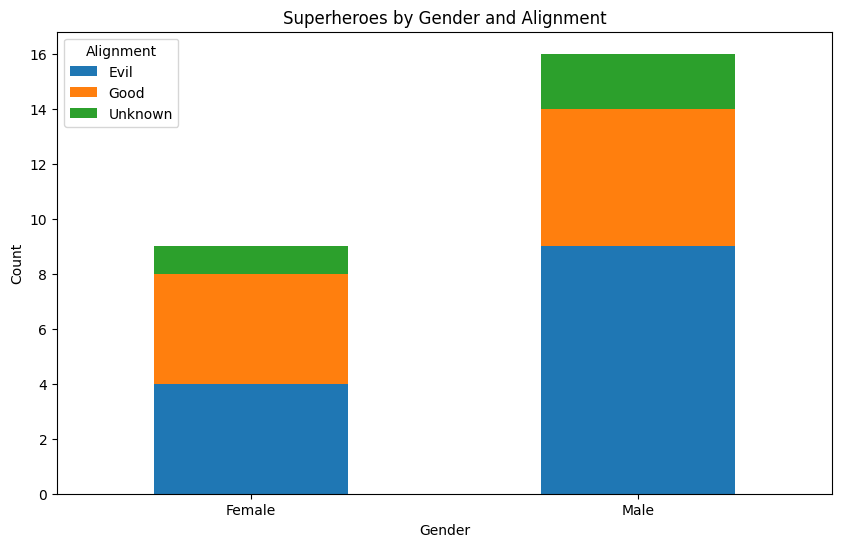

In [55]:
# Create a stacked bar chart
gender_alignment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Superheroes by Gender and Alignment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Alignment')

# Display the plot
plt.show()


**Grouped bar chart**

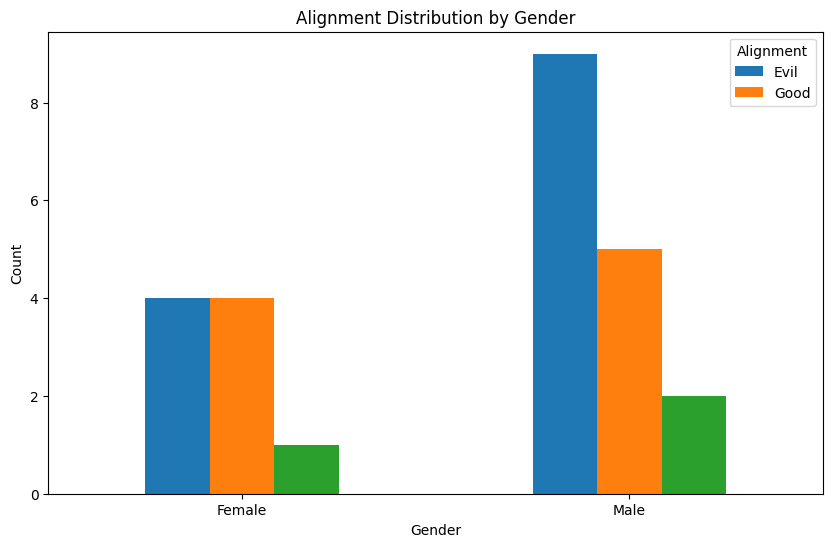

In [56]:
# Create a grouped bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Horizontal stacked bar**

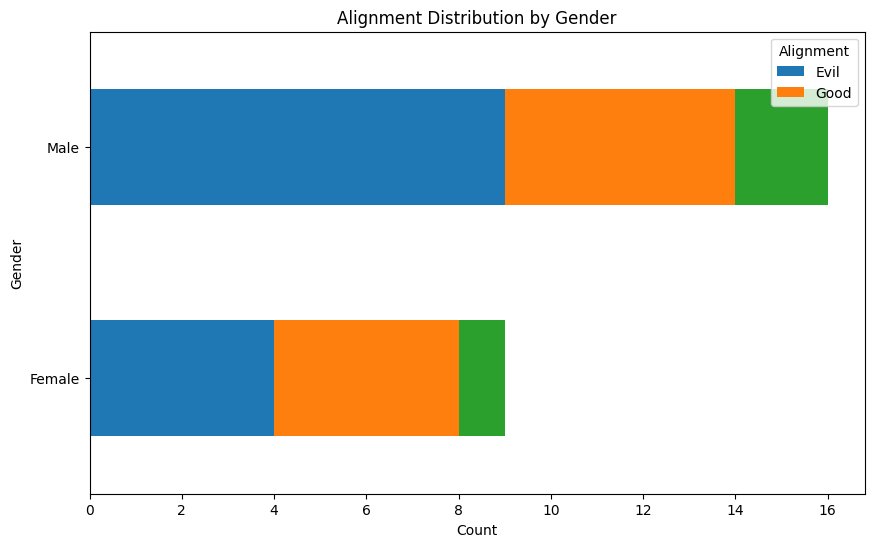

In [57]:
# Create a horizontal bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])

# Display the plot
plt.show()

### Data Analysis 2b: Analysing the superheroes gender distribution by Alignment

#### Activity: Analyse and Visualise
**Superhero Gender Distribution by Alignment Analysis**

We look for trends, such as whether a particular alignment is more commonly associated with being 'Male' or 'Female' gender.

In [ ]:
# Group the data by alignment and gender


In [ ]:
# Create a grouped bar chart to visualize the distribution


# Display the plot


# Markdown Guide Sources:
- https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Cheat_sheet_for_Google_Colab.ipynb
- https://colab.research.google.com/notebooks/markdown_guide.ipynb
- https://www.markdownguide.org/cheat-sheet/
